In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Load dataset
housing = fetch_california_housing()

# Convert to DataFrame
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal")

print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)


In [5]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42
)


In [6]:
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (14448, 8)
Validation set size: (3096, 8)
Test set size: (3096, 8)


In [7]:
print(X_train.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [8]:
scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


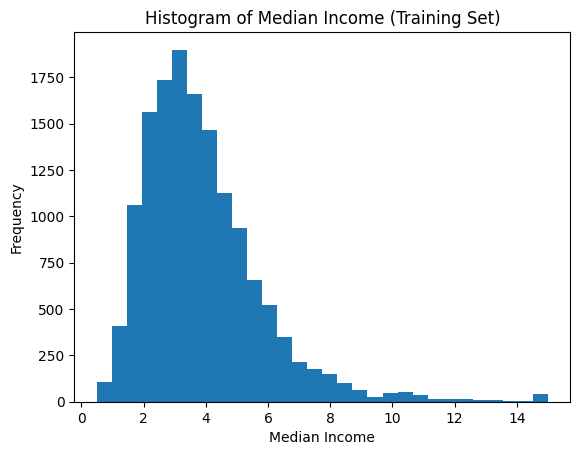

In [10]:
plt.figure()
plt.hist(X_train["MedInc"], bins=30)
plt.title("Histogram of Median Income (Training Set)")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()


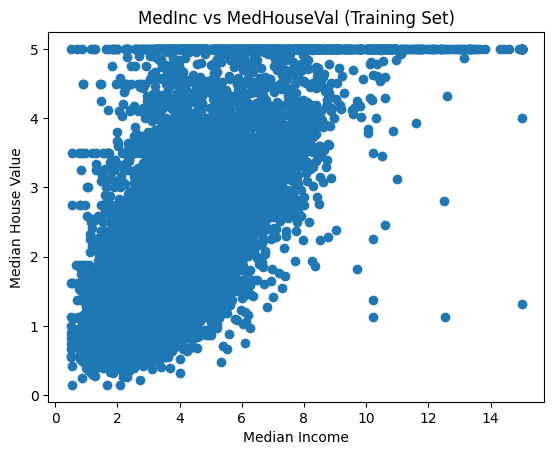

In [11]:
plt.figure()
plt.scatter(X_train["MedInc"], y_train)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("MedInc vs MedHouseVal (Training Set)")
plt.show()


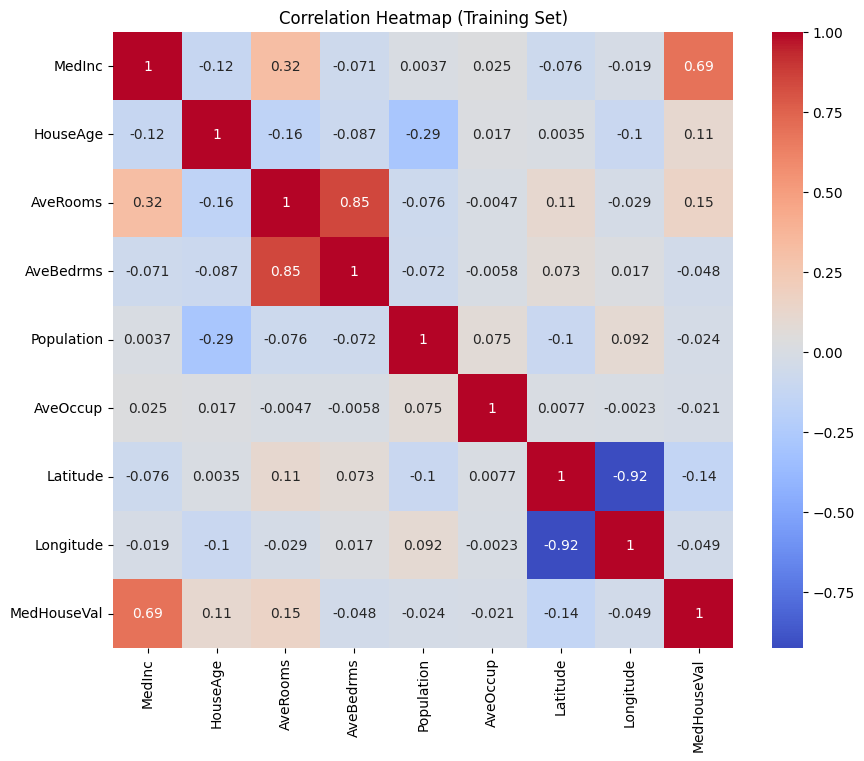

In [12]:
train_data = X_train.copy()
train_data["MedHouseVal"] = y_train

plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Training Set)")
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
# Use only MedInc
X_train_simple = X_train_scaled[["MedInc"]]
X_val_simple = X_val_scaled[["MedInc"]]
X_test_simple = X_test_scaled[["MedInc"]]


In [15]:
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Final Test Performance (Simple Linear Regression)
MSE: 0.6608572198292422
R2: 0.5002253561465753


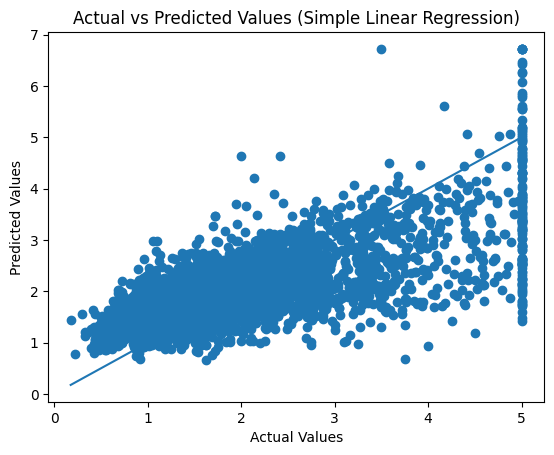

In [16]:
# Test prediction for Simple Linear Regression
y_test_pred_simple = simple_model.predict(X_test_simple)

test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)

print("Final Test Performance (Simple Linear Regression)")
print("MSE:", test_mse_simple)
print("R2:", test_r2_simple)

# Plot
plt.figure()
plt.scatter(y_test, y_test_pred_simple)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Simple Linear Regression)")
plt.show()


In [17]:
y_val_pred_simple = simple_model.predict(X_val_simple)

val_mse_simple = mean_squared_error(y_val, y_val_pred_simple)
val_r2_simple = r2_score(y_val, y_val_pred_simple)

print("Simple Linear Regression (Validation)")
print("MSE:", val_mse_simple)
print("R2:", val_r2_simple)


Simple Linear Regression (Validation)
MSE: 0.7227387537804579
R2: 0.44522825185757686


In [18]:
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_val_pred_multi = multi_model.predict(X_val_scaled)

val_mse_multi = mean_squared_error(y_val, y_val_pred_multi)
val_r2_multi = r2_score(y_val, y_val_pred_multi)

print("Multiple Linear Regression (Validation)")
print("MSE:", val_mse_multi)
print("R2:", val_r2_multi)


Multiple Linear Regression (Validation)
MSE: 0.5408750691093342
R2: 0.5848261822866255


In [20]:
print("Simple Validation R2:", val_r2_simple)
print("Multiple Validation R2:", val_r2_multi)


Simple Validation R2: 0.44522825185757686
Multiple Validation R2: 0.5848261822866255


In [21]:
y_test_pred = multi_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Final Test Performance (Multiple Linear Regression)")
print("MSE:", test_mse)
print("R2:", test_r2)


Final Test Performance (Multiple Linear Regression)
MSE: 0.5202604958440161
R2: 0.6065519204153755


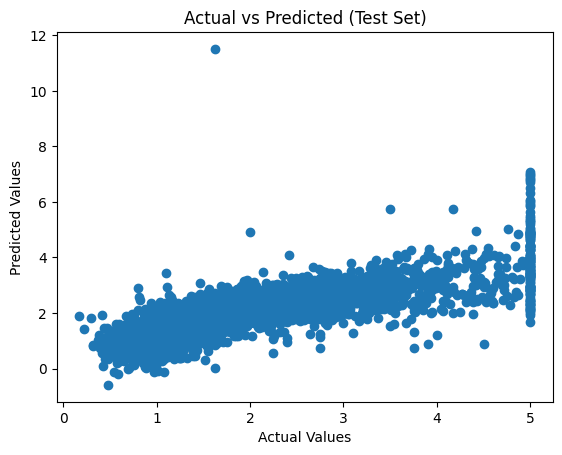

In [22]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.show()


In [23]:
# Calculate 33% and 66% thresholds from TRAINING data only
low_threshold = y_train.quantile(0.33)
high_threshold = y_train.quantile(0.66)

print("Low threshold:", low_threshold)
print("High threshold:", high_threshold)


Low threshold: 1.405
High threshold: 2.273


In [24]:
def create_classes(y):
    return pd.cut(
        y,
        bins=[-np.inf, low_threshold, high_threshold, np.inf],
        labels=[0, 1, 2]  # 0=Low, 1=Medium, 2=High
    )


In [25]:
y_train_cls = create_classes(y_train)
y_val_cls = create_classes(y_val)
y_test_cls = create_classes(y_test)


In [26]:
y_train_cls = y_train_cls.astype(int)
y_val_cls = y_val_cls.astype(int)
y_test_cls = y_test_cls.astype(int)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_cls)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
y_val_pred_log = log_model.predict(X_val_scaled)

print("Logistic Regression Validation Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_log))


Logistic Regression Validation Accuracy: 0.7131782945736435


In [30]:
best_depth = None
best_val_acc = 0

for depth in [3, 5, 7, 10]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train_cls)
    
    y_val_pred = dt.predict(X_val_scaled)
    acc = accuracy_score(y_val_cls, y_val_pred)
    
    print(f"Depth {depth} → Validation Accuracy: {acc}")
    
    if acc > best_val_acc:
        best_val_acc = acc
        best_depth = depth

print("Best Depth:", best_depth)


Depth 3 → Validation Accuracy: 0.6040051679586563
Depth 5 → Validation Accuracy: 0.6711886304909561
Depth 7 → Validation Accuracy: 0.7112403100775194
Depth 10 → Validation Accuracy: 0.7412790697674418
Best Depth: 10


In [31]:
dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_model.fit(X_train_scaled, y_train_cls)


,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
best_n = None
best_val_acc = 0

for n in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train_cls)
    
    y_val_pred = rf.predict(X_val_scaled)
    acc = accuracy_score(y_val_cls, y_val_pred)
    
    print(f"Trees {n} → Validation Accuracy: {acc}")
    
    if acc > best_val_acc:
        best_val_acc = acc
        best_n = n

print("Best n_estimators:", best_n)


Trees 50 → Validation Accuracy: 0.7974806201550387
Trees 100 → Validation Accuracy: 0.8000645994832042
Trees 200 → Validation Accuracy: 0.8010335917312662
Best n_estimators: 200


In [33]:
rf_model = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_model.fit(X_train_scaled, y_train_cls)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_test_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Test Accuracy:",
      accuracy_score(y_test_cls, y_test_pred_log))

print(confusion_matrix(y_test_cls, y_test_pred_log))
print(classification_report(y_test_cls, y_test_pred_log))


Logistic Regression Test Accuracy: 0.7206072351421189
[[767 235  18]
 [192 612 205]
 [ 23 192 852]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1020
           1       0.59      0.61      0.60      1009
           2       0.79      0.80      0.80      1067

    accuracy                           0.72      3096
   macro avg       0.72      0.72      0.72      3096
weighted avg       0.72      0.72      0.72      3096



In [35]:
y_test_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Test Accuracy:",
      accuracy_score(y_test_cls, y_test_pred_dt))

print(confusion_matrix(y_test_cls, y_test_pred_dt))
print(classification_report(y_test_cls, y_test_pred_dt))


Decision Tree Test Accuracy: 0.7600129198966409
[[798 184  38]
 [135 681 193]
 [ 26 167 874]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1020
           1       0.66      0.67      0.67      1009
           2       0.79      0.82      0.80      1067

    accuracy                           0.76      3096
   macro avg       0.76      0.76      0.76      3096
weighted avg       0.76      0.76      0.76      3096



In [36]:
y_test_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Test Accuracy:",
      accuracy_score(y_test_cls, y_test_pred_rf))

print(confusion_matrix(y_test_cls, y_test_pred_rf))
print(classification_report(y_test_cls, y_test_pred_rf))


Random Forest Test Accuracy: 0.8236434108527132
[[886 120  14]
 [130 752 127]
 [ 18 137 912]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1020
           1       0.75      0.75      0.75      1009
           2       0.87      0.85      0.86      1067

    accuracy                           0.82      3096
   macro avg       0.82      0.82      0.82      3096
weighted avg       0.82      0.82      0.82      3096



In [37]:
from sklearn.svm import SVC


In [38]:
best_model = None
best_val_acc = 0
best_params = None

for kernel in ["linear", "rbf"]:
    for C in [0.1, 1, 10]:
        for gamma in ["scale", 0.01, 0.1] if kernel == "rbf" else ["auto"]:
            
            svm = SVC(kernel=kernel, C=C, gamma=gamma)
            svm.fit(X_train_scaled, y_train_cls)
            
            y_val_pred = svm.predict(X_val_scaled)
            acc = accuracy_score(y_val_cls, y_val_pred)
            
            print(f"Kernel={kernel}, C={C}, gamma={gamma} → Val Acc={acc}")
            
            if acc > best_val_acc:
                best_val_acc = acc
                best_model = svm
                best_params = (kernel, C, gamma)

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_val_acc)


Kernel=linear, C=0.1, gamma=auto → Val Acc=0.7070413436692506
Kernel=linear, C=1, gamma=auto → Val Acc=0.7154392764857881
Kernel=linear, C=10, gamma=auto → Val Acc=0.7147932816537468
Kernel=rbf, C=0.1, gamma=scale → Val Acc=0.7031653746770026
Kernel=rbf, C=0.1, gamma=0.01 → Val Acc=0.6708656330749354
Kernel=rbf, C=0.1, gamma=0.1 → Val Acc=0.7028423772609819
Kernel=rbf, C=1, gamma=scale → Val Acc=0.7406330749354005
Kernel=rbf, C=1, gamma=0.01 → Val Acc=0.7047803617571059
Kernel=rbf, C=1, gamma=0.1 → Val Acc=0.7374031007751938
Kernel=rbf, C=10, gamma=scale → Val Acc=0.7619509043927648
Kernel=rbf, C=10, gamma=0.01 → Val Acc=0.727390180878553
Kernel=rbf, C=10, gamma=0.1 → Val Acc=0.7538759689922481
Best Parameters: ('rbf', 10, 'scale')
Best Validation Accuracy: 0.7619509043927648


In [39]:
y_test_pred_svm = best_model.predict(X_test_scaled)

svm_test_acc = accuracy_score(y_test_cls, y_test_pred_svm)

print("SVM Test Accuracy:", svm_test_acc)
print(confusion_matrix(y_test_cls, y_test_pred_svm))
print(classification_report(y_test_cls, y_test_pred_svm))


SVM Test Accuracy: 0.7761627906976745
[[820 183  17]
 [143 710 156]
 [ 15 179 873]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1020
           1       0.66      0.70      0.68      1009
           2       0.83      0.82      0.83      1067

    accuracy                           0.78      3096
   macro avg       0.78      0.78      0.78      3096
weighted avg       0.78      0.78      0.78      3096



In [40]:
rf_test_acc = accuracy_score(y_test_cls, y_test_pred_rf)

print("Random Forest Test Accuracy:", rf_test_acc)
print("SVM Test Accuracy:", svm_test_acc)


Random Forest Test Accuracy: 0.8236434108527132
SVM Test Accuracy: 0.7761627906976745


In [41]:
from sklearn.neural_network import MLPClassifier


In [42]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='relu',
    solver='adam',
    max_iter=200,
    early_stopping=True,
    validation_fraction=0.15,
    random_state=42
)


In [43]:
mlp.fit(X_train_scaled, y_train_cls)


,hidden_layer_sizes,"(64,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,42


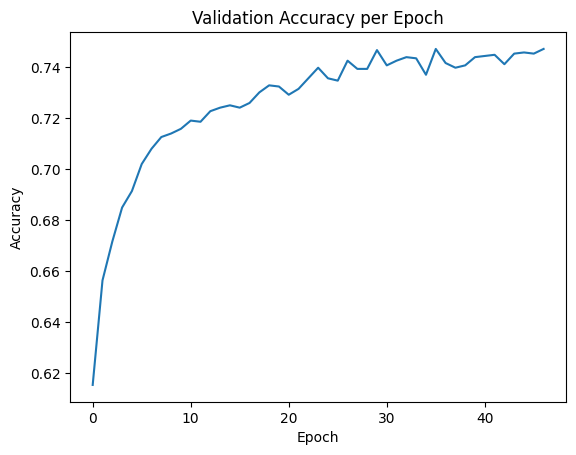

In [44]:
plt.figure()
plt.plot(mlp.validation_scores_)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


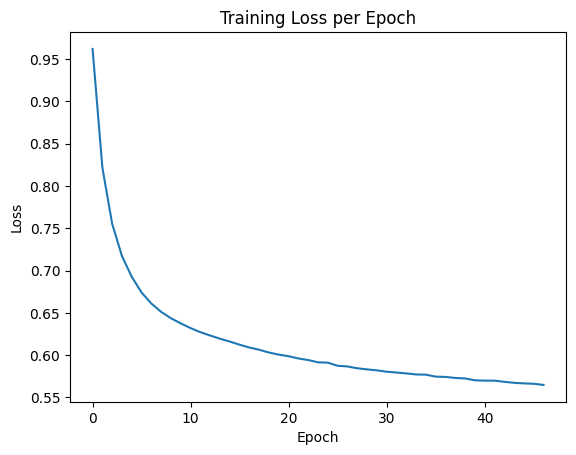

In [45]:
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [46]:
y_test_pred_mlp = mlp.predict(X_test_scaled)

mlp_test_acc = accuracy_score(y_test_cls, y_test_pred_mlp)

print("Neural Network Test Accuracy:", mlp_test_acc)
print(confusion_matrix(y_test_cls, y_test_pred_mlp))
print(classification_report(y_test_cls, y_test_pred_mlp))


Neural Network Test Accuracy: 0.7516149870801033
[[801 197  22]
 [178 649 182]
 [ 18 172 877]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1020
           1       0.64      0.64      0.64      1009
           2       0.81      0.82      0.82      1067

    accuracy                           0.75      3096
   macro avg       0.75      0.75      0.75      3096
weighted avg       0.75      0.75      0.75      3096



In [47]:
import joblib


In [48]:
joblib.dump(multi_model, "models/regression_model.pkl")


['models/regression_model.pkl']

In [49]:

import joblib

joblib.dump(log_model, "models/logistic_model.pkl")
joblib.dump(dt_model, "models/decision_tree_model.pkl")
joblib.dump(rf_model, "models/random_forest_model.pkl")
joblib.dump(best_model, "models/svm_model.pkl")      # SVM
joblib.dump(mlp, "models/mlp_model.pkl")

['models/mlp_model.pkl']

In [50]:
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [51]:
thresholds = {
    "low": low_threshold,
    "high": high_threshold
}

joblib.dump(thresholds, "models/thresholds.pkl")


['models/thresholds.pkl']

In [52]:
# Take first 5 test samples
sample_data = X_test.iloc[:5]
sample_scaled = scaler.transform(sample_data)

# Regression predictions
reg_preds = multi_model.predict(sample_scaled)

# Classification predictions
cls_preds = rf_model.predict(sample_scaled)

print("Actual Values:")
print(y_test.iloc[:5].values)

print("\nPredicted Values (Regression):")
print(reg_preds)

print("\nPredicted Classes:")
print(cls_preds)


Actual Values:
[1.    1.188 3.761 2.    0.952]

Predicted Values (Regression):
[1.38608451 0.80620156 2.03904454 2.31882746 1.95020078]

Predicted Classes:
[0 0 2 0 1]


c:\Users\KIIT0001\Desktop\PROJECTS\2305959_ADL_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\KIIT0001\Desktop\PROJECTS\2305959_ADL_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
class_labels = {
    0: "Low Value",
    1: "Medium Value",
    2: "High Value"
}

print("\nReadable Class Predictions:")
print([class_labels[c] for c in cls_preds])



Readable Class Predictions:
['Low Value', 'Low Value', 'High Value', 'Low Value', 'Medium Value']


In [54]:
example = np.array([[3.5,   # MedInc
                     25,    # HouseAge
                     5.5,   # AveRooms
                     1.0,   # AveBedrms
                     1200,  # Population
                     3.0,   # AveOccup
                     34.2,  # Latitude
                     -118.4 # Longitude
                    ]])

example_scaled = scaler.transform(example)

reg_pred = multi_model.predict(example_scaled)[0]
cls_pred = rf_model.predict(example_scaled)[0]

print("Predicted House Value:", reg_pred)
print("Predicted Class:", class_labels[cls_pred])


Predicted House Value: 1.87691943989558
Predicted Class: Medium Value


c:\Users\KIIT0001\Desktop\PROJECTS\2305959_ADL_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\KIIT0001\Desktop\PROJECTS\2305959_ADL_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\KIIT0001\Desktop\PROJECTS\2305959_ADL_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
# ==========================================
# CLUSTERING TASK (KMEANS)
# ==========================================

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


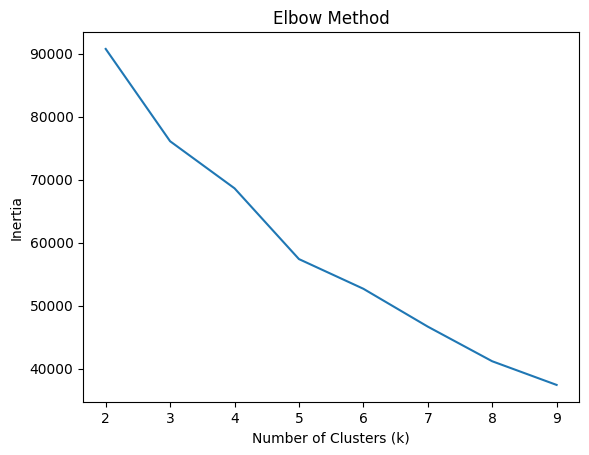

In [56]:
inertia_values = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 10), inertia_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [57]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_model.fit(X_train_scaled)


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [58]:
train_clusters = kmeans_model.predict(X_train_scaled)

sil_score = silhouette_score(X_train_scaled, train_clusters)

print("Silhouette Score:", sil_score)


Silhouette Score: 0.33383695609229236


In [59]:
cluster_df = X_train.copy()
cluster_df["Cluster"] = train_clusters

cluster_summary = cluster_df.groupby("Cluster").mean()
print(cluster_summary)


           MedInc   HouseAge   AveRooms  AveBedrms   Population  AveOccup  \
Cluster                                                                     
0        3.918964  28.452000   5.208911   1.073737  1528.331611  3.102393   
1        3.314780  18.535714  31.636802   6.534366   258.375000  2.552091   
2        3.824380  28.837205   5.510726   1.081191  1301.025045  3.147569   

          Latitude   Longitude  
Cluster                         
0        33.954432 -118.017131  
1        37.815893 -119.535893  
2        37.956902 -121.733485  


In [60]:
joblib.dump(kmeans_model, "models/clustering_model.pkl")


['models/clustering_model.pkl']

In [61]:
print(cluster_summary)

           MedInc   HouseAge   AveRooms  AveBedrms   Population  AveOccup  \
Cluster                                                                     
0        3.918964  28.452000   5.208911   1.073737  1528.331611  3.102393   
1        3.314780  18.535714  31.636802   6.534366   258.375000  2.552091   
2        3.824380  28.837205   5.510726   1.081191  1301.025045  3.147569   

          Latitude   Longitude  
Cluster                         
0        33.954432 -118.017131  
1        37.815893 -119.535893  
2        37.956902 -121.733485  


In [62]:
print("=== COMPARISONS ===\n")

models_test = {
    "Logistic Regression": log_model.predict(X_test_scaled),
    "Decision Tree": dt_model.predict(X_test_scaled),
    "Random Forest": rf_model.predict(X_test_scaled),
}

for name, preds in models_test.items():
    print(name)
    print("accuracy:", accuracy_score(y_test_cls, preds))
    print()


=== COMPARISONS ===

Logistic Regression
accuracy: 0.7206072351421189

Decision Tree
accuracy: 0.7600129198966409

Random Forest
accuracy: 0.8236434108527132

